# Predicting_Automobile_Price 

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
import warnings
warnings.simplefilter("ignore")

### Step 1 : Reading and Understanding the data

In [121]:
data = pd.read_csv("AutoData (1).csv")                
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [122]:
data.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [123]:
data.shape

(205, 25)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Step 2 : Data cleaning and Preparation

In [125]:
# No null Values in the dataframe

data.isnull().sum()                                          

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [126]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [127]:
# 15 numerical and 10 categorical columns are present

len(data.describe().columns)          

15

In [128]:
data["make"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [129]:
# Extracting Company name from car name

data["company_name"] = data["make"].apply(lambda x : x.split(" ")[0])
data.drop( "make" , axis = 1 , inplace = True)

In [130]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [131]:
# Company names 

data["company_name"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
maxda           2
vw              2
vokswagen       1
Nissan          1
porcshce        1
mercury         1
toyouta         1
Name: company_name, dtype: int64

### Fixing invalid values

- There are some spelling errors.

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [132]:
len(data["company_name"].value_counts())

28

In [133]:
data["company_name"] = data["company_name"].apply( lambda x : x.lower() )

In [134]:
len(data["company_name"].value_counts())

27

In [135]:
data["company_name"].replace({
    "maxda"    : "mazda"     ,
    "porcshce" : "porsche"   ,
    "toyouta"  : "toyota"    ,
    "vw"       : "volkswagen",
    "vokswagen": "volkswagen"
} , inplace = True)

In [136]:
data["company_name"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: company_name, dtype: int64

In [137]:
len(data["company_name"].value_counts())

# Successfully fixed the Invalid Values

22

### Step 3 : Exploratory Data Analysis

> Visualizing Categorical variables

In [138]:
# Extracting Numerical and categorical columns

numeric_data = list(data.select_dtypes(include=[np.number]).columns)
categorical_data = list(data.select_dtypes(exclude=[np.number]).columns)

In [139]:
numeric_data

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [140]:
categorical_data

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company_name']

### Comparing Average price of a car with its features

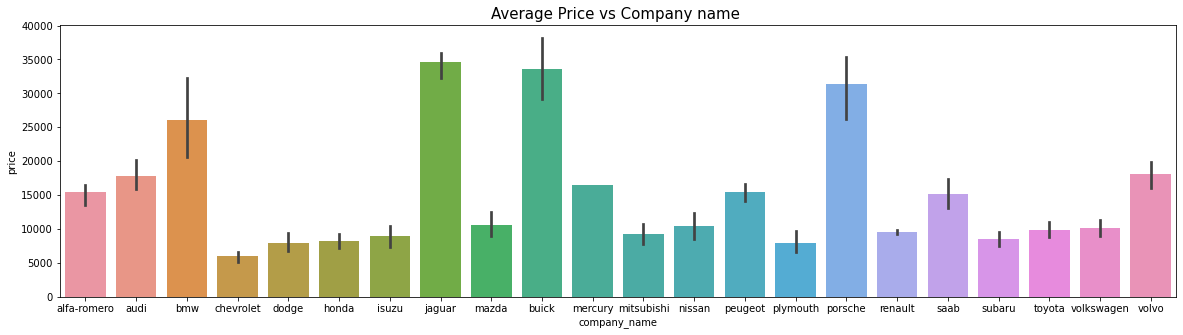

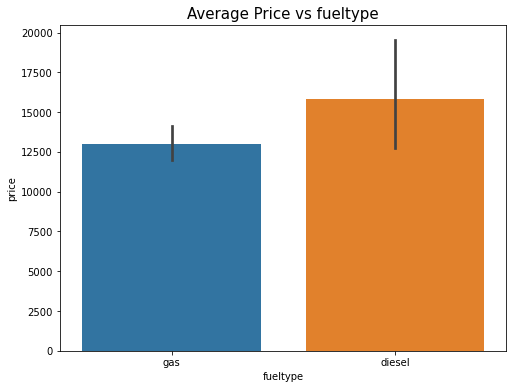

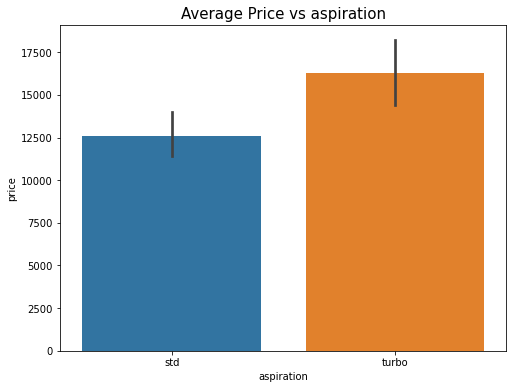

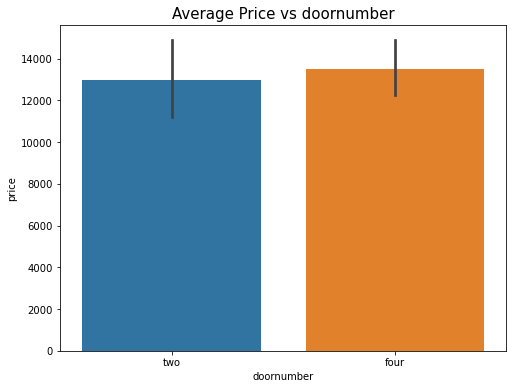

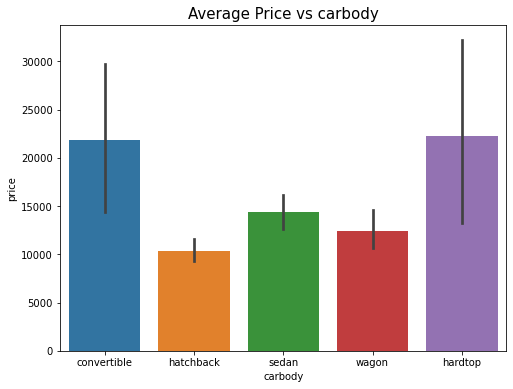

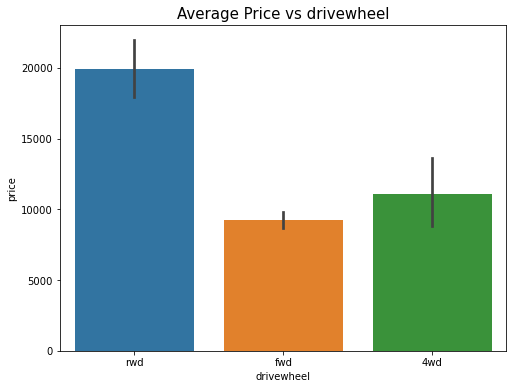

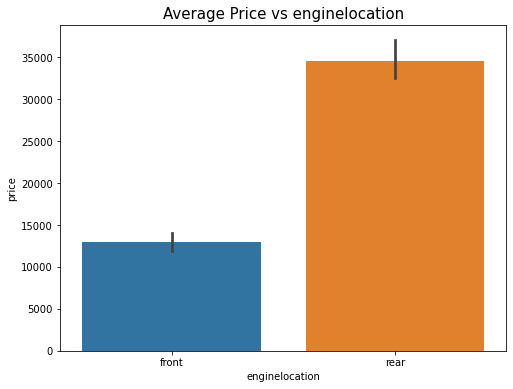

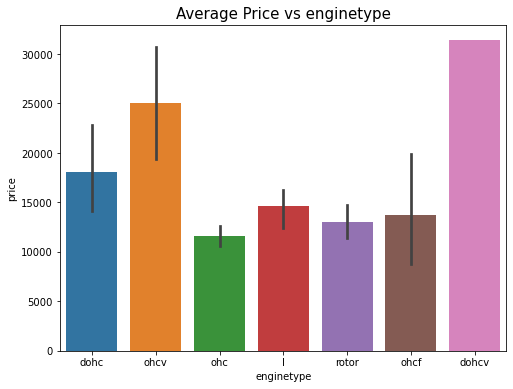

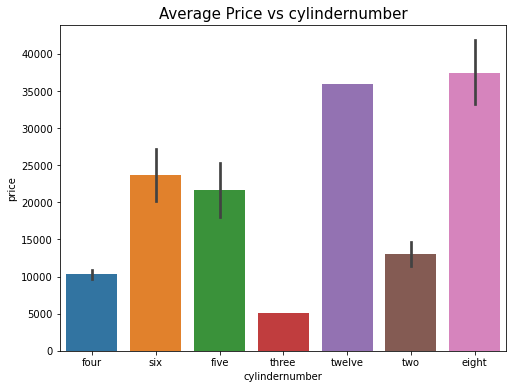

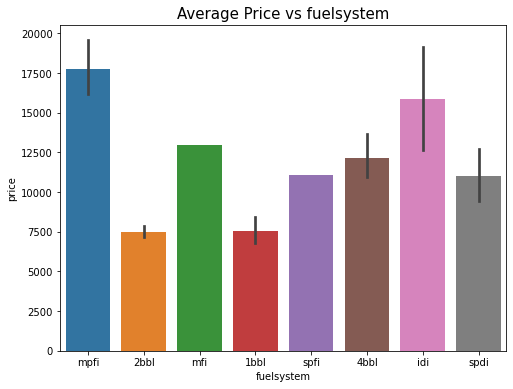

In [141]:
plt.figure(figsize=(20,5))
sns.barplot( data["company_name"] , data["price"] )
plt.title("Average Price vs Company name ",fontsize=15)
plt.show()

for i in categorical_data[:-1] :
    plt.figure(figsize=(8,6))
    sns.barplot( data[i] , data["price"] )
    plt.title("Average Price vs "+i,fontsize=15)
    plt.show()

### Some Insights
- Avg price of JAGUAR , BUICK and PORSCHE company cars are high .
- Cars which are having fueltype as  DIESEL and aspiration as TURBO are having  high price when compared with other fuel and aspiration types  .
- We can observe that cars  which are having number of doors as TWO or FOUR  has almost equal price .
- we can identify that cars with its body as HARDTOP and CONVERTIBLE are having quite higher prices when compared with other types of bodies .
- We can see that cars with RWD(rear wheel drive) as drive wheel and REAR-ENGINE location vehicles are having more price .
- Cars with "DOHCV" type of engines and cylindernumber as EIGHT and TWELVE are having higher prices compared with others .
- MPFI and IDI fuel system cars are having high price .

### Number of Cars sold with correspong features

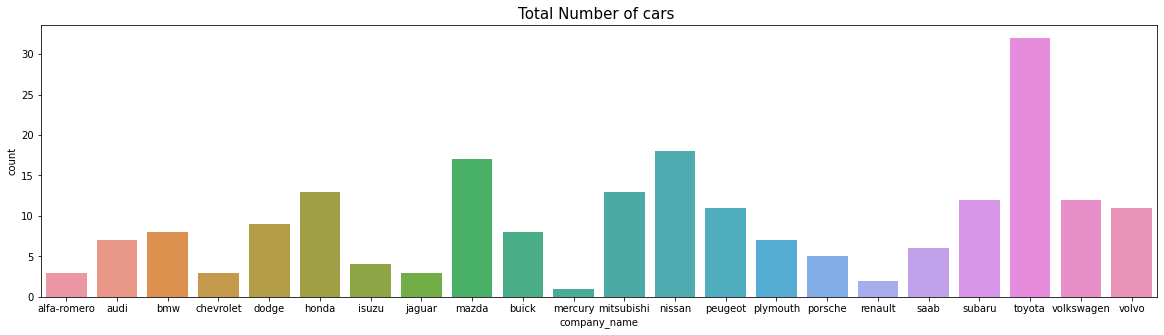

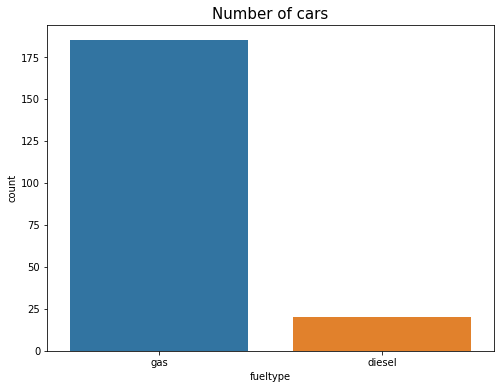

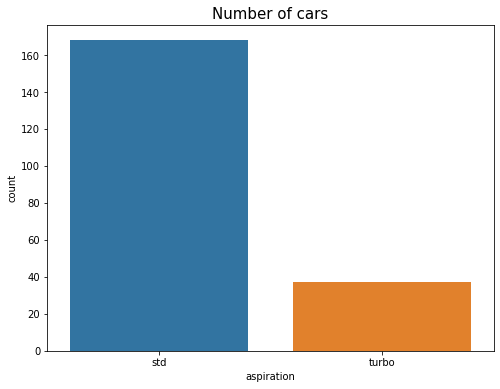

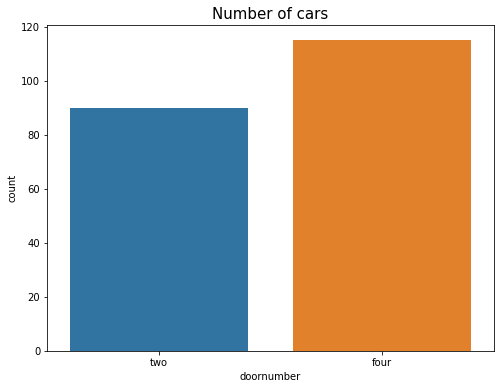

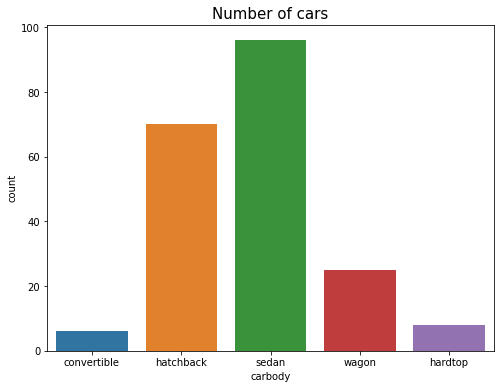

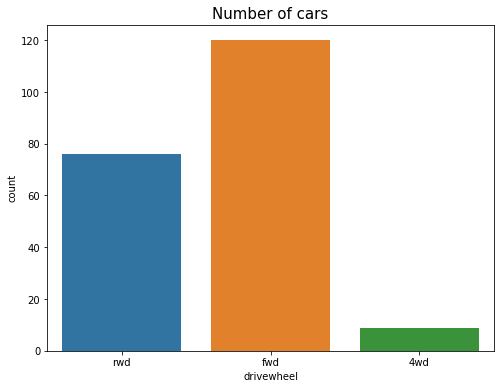

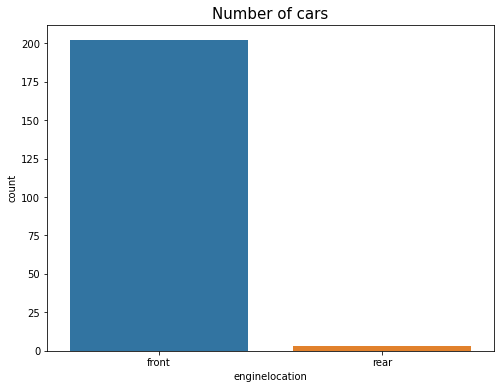

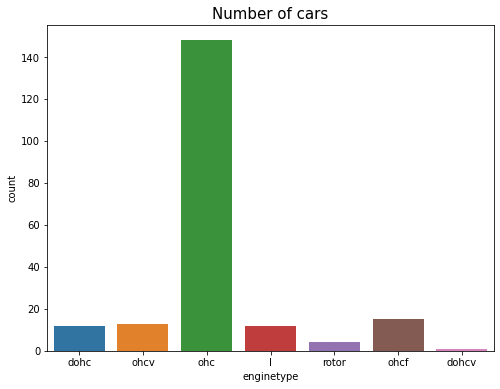

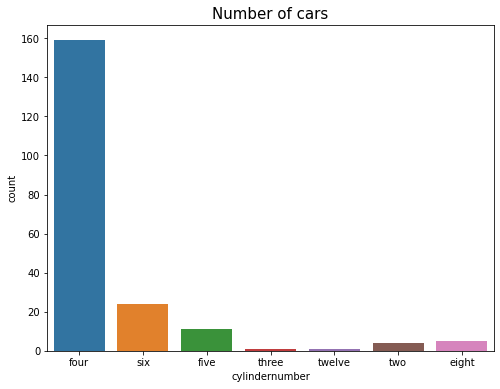

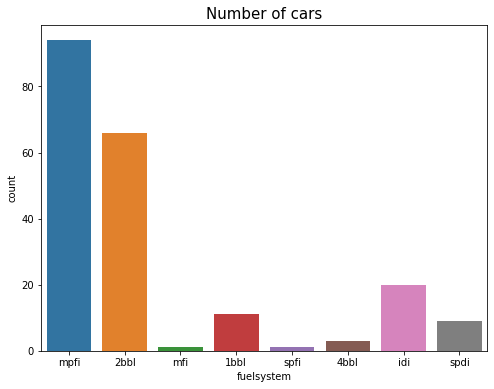

In [142]:
plt.figure(figsize=(20,5))
sns.countplot( data["company_name"]  )
plt.title("Total Number of cars ",fontsize=15)
plt.show()

for i in categorical_data[:-1] :
    plt.figure(figsize=(8,6))
    sns.countplot( data[i]  )
    plt.title("Number of cars",fontsize=15)
    plt.show() 

### Some insights
- TOYOTA company cars were sold in higher number when compared with other company's cars .
- Number of cars sold with fuel type as GAS and aspiration as STD are extremely high .
- FOUR DOOR cars are sold slightly higher than TWO DOOR cars .
- Cars with SEDAN carbody were purchased most followed by HATCHBACK carbody .
- Cars with FWD drivewheel were purchased most followed by RWD drive wheel  .
- Almost every car which were sold are of engine type as OHC and engine location as FRONT   .
- Number of cars which were sold are having cylinder number as FOUR and fuel systems as MPFI or 2BBI .

> Visualizing Numerical Variables

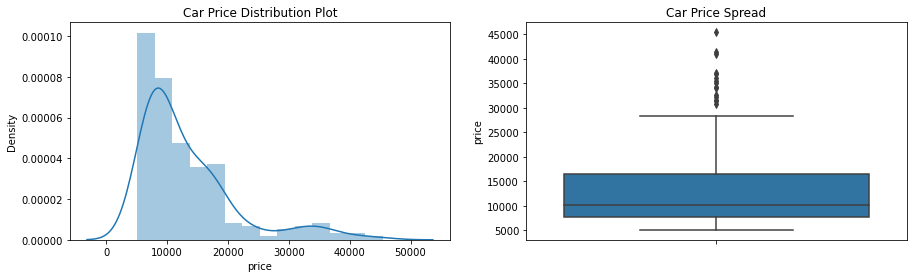

In [143]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data["price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot( y = data["price"])

plt.show()

In [144]:
data["price"].describe( percentiles = [ 0.25 , 0.50 , 0.75 , 0.85 , 0.90  , 0.95 ])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
95%      32472.400000
max      45400.000000
Name: price, dtype: float64

- The above plot looking like right - skewed which means that most prices in the dataset are below 20,000 . 
- We can notice that 85% of the values in the dataset are below 18,500 and 15% are between 18,500 - 45,400 , which means high variance when compared with mean . 

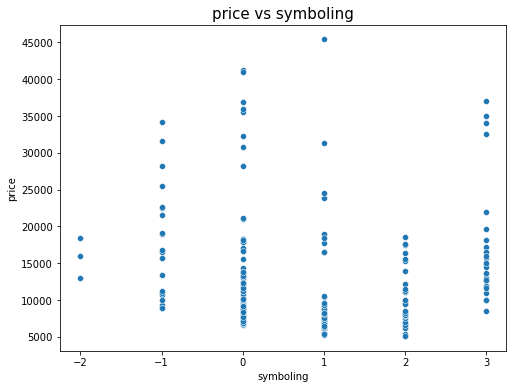

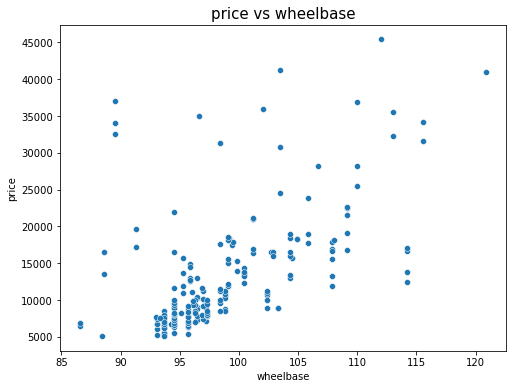

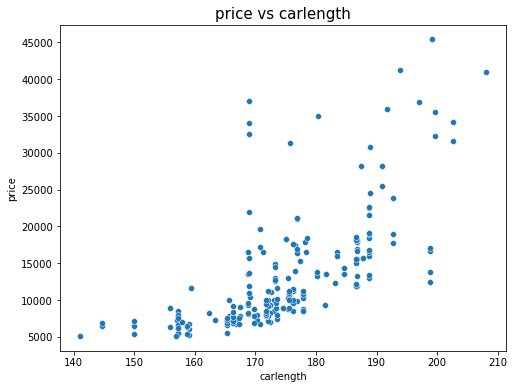

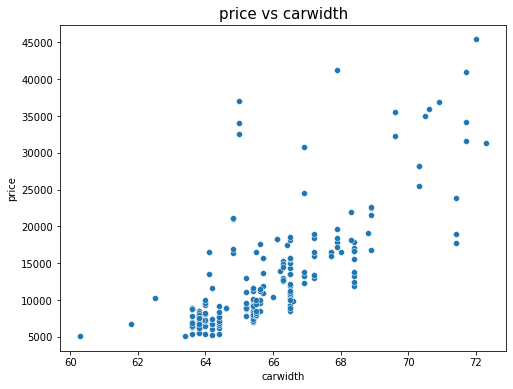

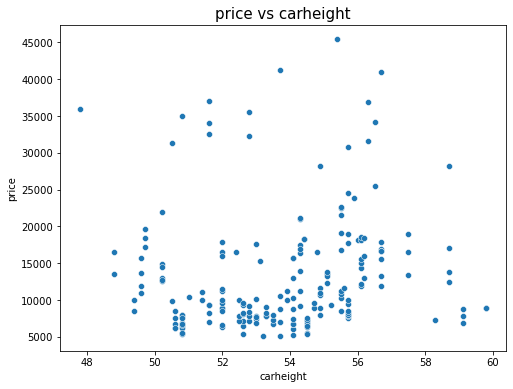

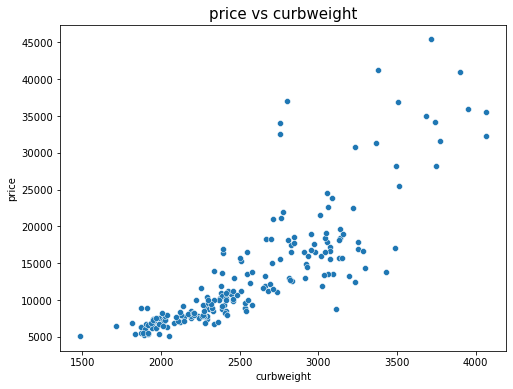

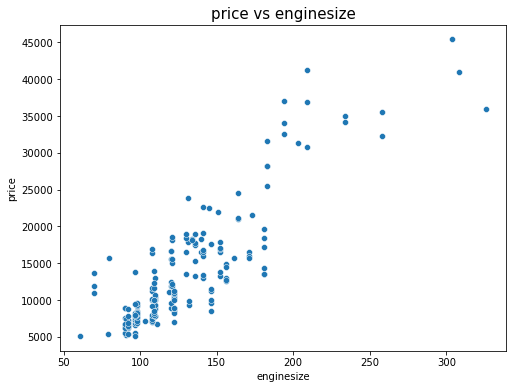

In [145]:
for i in numeric_data :
    if numeric_data.index(i) < 7 :
        plt.figure(figsize=(8,6))
        sns.scatterplot( x = data[i] , y = data["price"] )
        plt.title("price vs "+i ,fontsize=15)
        plt.show()

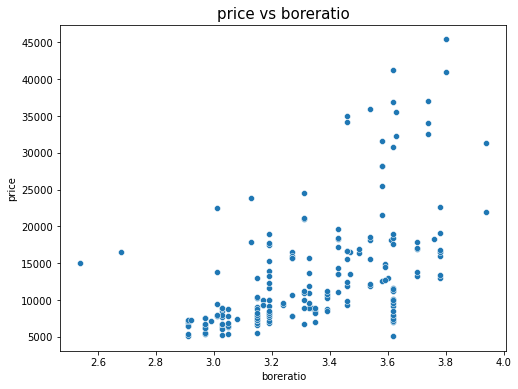

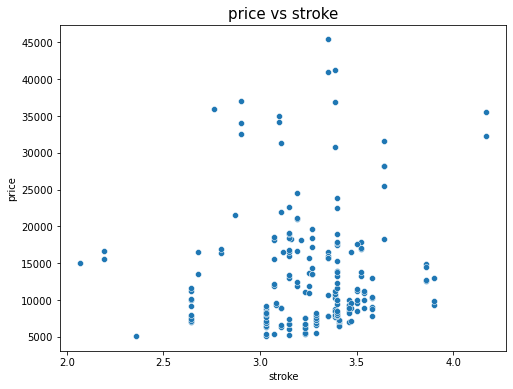

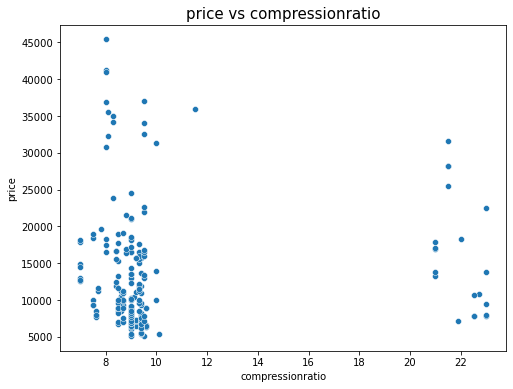

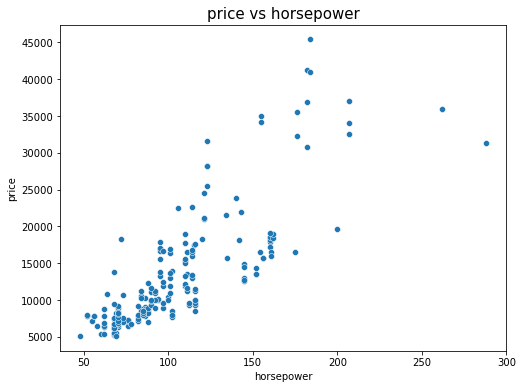

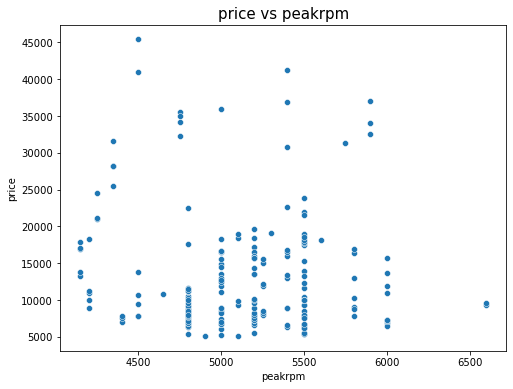

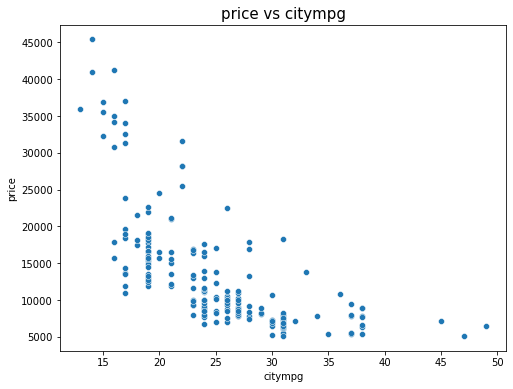

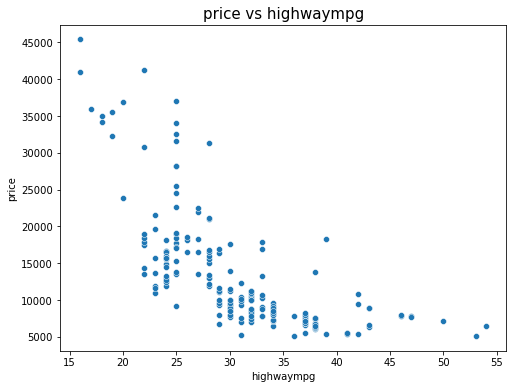

In [146]:
for i in numeric_data :
    if numeric_data.index(i) >= 7 and i!= "price" :
        plt.figure(figsize=(8,6))
        sns.scatterplot( x = data[i] , y = data["price"] )
        plt.title("price vs "+i ,fontsize=15)
        plt.show()

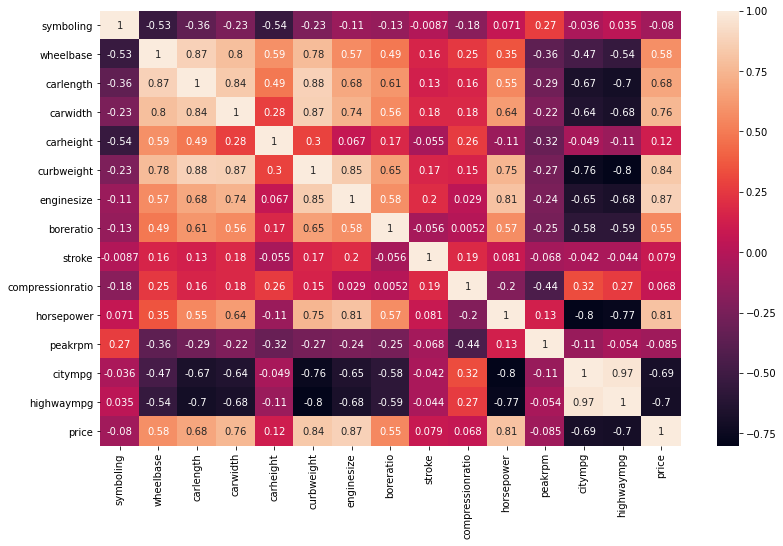

In [147]:
plt.figure( figsize = (13,8))
sns.heatmap(data = data.corr() , annot = True );

### Some insights
> Features having Correlation with Price
- Positive Correlation Variables  :  WHEEL BASE , CARLENGTH , CARWIDTH , CURBWEIGHT  , ENGINE SIZE , BORERATIO , HORSE POWER 
- Negative Correlation Variables  :  CITYMPG , HIGHWAYMPG

### Step 4 : Feature Extraction 

### Some Significant Variables 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- fuelsystem
- enginelocation
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 

In [148]:
numeric_features = data[numeric_data]

In [149]:
numeric_features.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [150]:
numeric_features = numeric_features[ [ "wheelbase" , "carlength" , "carwidth" , "curbweight" , 
                                      
                                      "enginesize" , "horsepower" , "boreratio" , "price" ] ]

In [151]:
numeric_features.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,price
0,88.6,168.8,64.1,2548,130,111,3.47,13495.0
1,88.6,168.8,64.1,2548,130,111,3.47,16500.0
2,94.5,171.2,65.5,2823,152,154,2.68,16500.0
3,99.8,176.6,66.2,2337,109,102,3.19,13950.0
4,99.4,176.6,66.4,2824,136,115,3.19,17450.0


In [152]:
categorical_features = data[ categorical_data]
categorical_features.drop( ["company_name" , "doornumber" ] , axis = 1 , inplace = True )
categorical_features.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,convertible,rwd,front,dohc,four,mpfi
1,gas,std,convertible,rwd,front,dohc,four,mpfi
2,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,sedan,fwd,front,ohc,four,mpfi
4,gas,std,sedan,4wd,front,ohc,five,mpfi


In [153]:
final_data_frame = numeric_features.join(categorical_features)
final_data_frame.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,price,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,88.6,168.8,64.1,2548,130,111,3.47,13495.0,gas,std,convertible,rwd,front,dohc,four,mpfi
1,88.6,168.8,64.1,2548,130,111,3.47,16500.0,gas,std,convertible,rwd,front,dohc,four,mpfi
2,94.5,171.2,65.5,2823,152,154,2.68,16500.0,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,99.8,176.6,66.2,2337,109,102,3.19,13950.0,gas,std,sedan,fwd,front,ohc,four,mpfi
4,99.4,176.6,66.4,2824,136,115,3.19,17450.0,gas,std,sedan,4wd,front,ohc,five,mpfi


In [154]:
num_col = numeric_features.columns
cat_col = categorical_features.columns

In [155]:
num_col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'horsepower', 'boreratio', 'price'],
      dtype='object')

In [156]:
cat_col

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

### Step 5 Modelling

In [157]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
final_data_frame[num_col] = ss.fit_transform( final_data_frame[num_col] )
final_data_frame.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,price,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,0.519071,0.027391,gas,std,convertible,rwd,front,dohc,four,mpfi
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,0.519071,0.404461,gas,std,convertible,rwd,front,dohc,four,mpfi
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,1.264536,-2.404880,0.404461,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.053668,-0.517266,0.084485,gas,std,sedan,fwd,front,ohc,four,mpfi
4,0.107110,0.207256,0.230001,0.516807,0.218885,0.275883,-0.517266,0.523668,gas,std,sedan,4wd,front,ohc,five,mpfi


In [158]:
final_data_frame = pd.get_dummies ( final_data_frame , columns= cat_col )
final_data_frame.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,price,fueltype_diesel,fueltype_gas,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,0.519071,0.027391,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.174483,0.519071,0.404461,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,1.264536,-2.404880,0.404461,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.053668,-0.517266,0.084485,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,0.275883,-0.517266,0.523668,0,1,...,0,0,0,0,0,0,0,1,0,0


In [159]:
X = final_data_frame

In [160]:
final_data_frame["price"].describe()

count    2.050000e+02
mean     1.581391e-16
std      1.002448e+00
min     -1.023762e+00
25%     -6.887281e-01
50%     -3.741476e-01
75%      4.048375e-01
max      4.030858e+00
Name: price, dtype: float64

In [161]:
y = X["price"]

In [162]:
X.drop( "price" , axis = 1 , inplace= True)

### Model :  Linear Regression

In [163]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.30 , random_state = 0 )

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [165]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [166]:
y_pred = lm.predict(X_test)

In [167]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.25957875235131156
Mean Squared Error: 0.15594320837373316
Root Mean Squared Error: 0.3948964527236642


In [168]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.8500239929615647


### R2 Score  is 85%

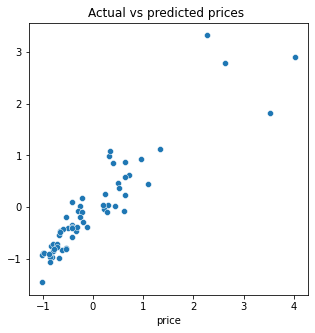

In [169]:
plt.figure( figsize=(5,5))
sns.scatterplot(y_test , y_pred)
plt.title("Actual vs predicted prices ")
plt.show;

In [170]:
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [171]:
X_train.columns[rfe.support_]

Index(['enginesize', 'carbody_hardtop', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_four', 'fuelsystem_mfi',
       'fuelsystem_spdi'],
      dtype='object')

- These are top 10 features contributing to our model

### --------------------------------------- Thank you ------------------------------------